<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/Prediksi_Harga_Rumah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Studi Kasus:
Kita akan membangun model untuk memprediksi harga rumah berdasarkan fitur-fitur seperti ukuran, jumlah kamar tidur, lokasi, dll.
Data yang digunakan berbentuk CSV dan diambil dari Kaggle. Dalam studi kasus ini, kita akan memahami proses feature engineering,
pemilihan model yang cocok, dan tuning hyperparameter untuk mendapatkan hasil prediksi yang optimal.

---

Link dataset Kaggle yang bisa digunakan:
https://www.kaggle.com/datasets/shree1992/housedata

---

Berikut adalah kode lengkap untuk prosesnya.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/content/data.csv')

In [3]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

# Exploratory Data Analysis (EDA)

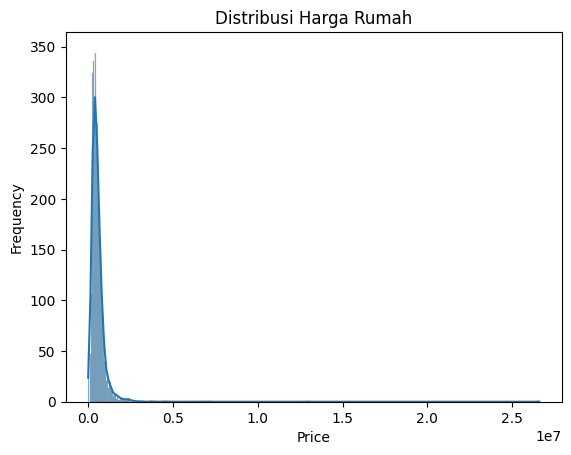

In [5]:
# Memvisualisasikan distribusi harga rumah
sns.histplot(df['price'], kde=True)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

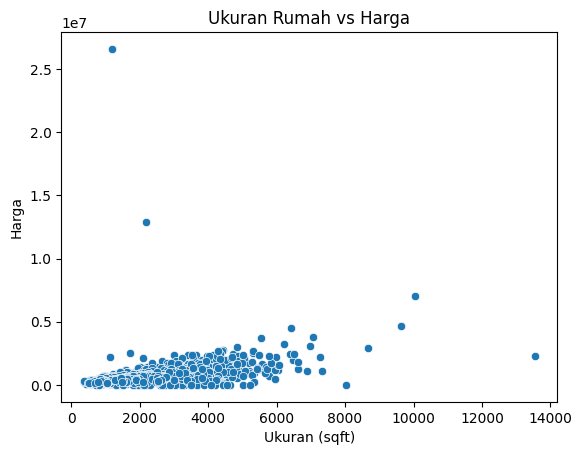

In [6]:
# Visualisasi hubungan antara ukuran (sqft_living) dan harga
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Ukuran Rumah vs Harga')
plt.xlabel('Ukuran (sqft)')
plt.ylabel('Harga')
plt.show()

# Feature Engineering

In [8]:
# Drop fitur yang tidak relevan
# Misalnya, 'id' dan 'date' tidak memberikan informasi yang relevan untuk prediksi
features_to_drop = ['date']
df = df.drop(columns=features_to_drop)

In [9]:
# Memisahkan fitur dan target
X = df.drop(columns=['price'])
y = df['price']

In [16]:
# Identifikasi tipe data untuk feature engineering
categorical_features = ['zipcode'] if 'zipcode' in X_train.columns else []
numerical_features = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64'] and col not in categorical_features]

In [17]:
# Preprocessing dengan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [18]:
# Membagi data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Membangun pipeline dengan RandomForestRegressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [20]:
# Hyperparameter tuning dengan GridSearchCV
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['bedrooms',
                                                                          'bathrooms',
                                                                          'sqft_living',
                                                                          'sqft_lot',
                                                                          'floors',
                                                                          'waterfront',
                                                                          'view',
                                                                          'condition',
                                                                          'sqft_above',
                                                                          'sqft_basement',
                                                                          'yr_built',
                                                                          'yr_renovated']),
                                                                        ('cat',
                                                                         OneHotEncoder(),
                                                                         [])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [21]:
# Model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

In [22]:
# Prediksi pada data test
y_pred = best_model.predict(X_test)

In [23]:
# Evaluasi model
test_mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {test_mse}')

Mean Squared Error on Test Set: 989143141801.6592


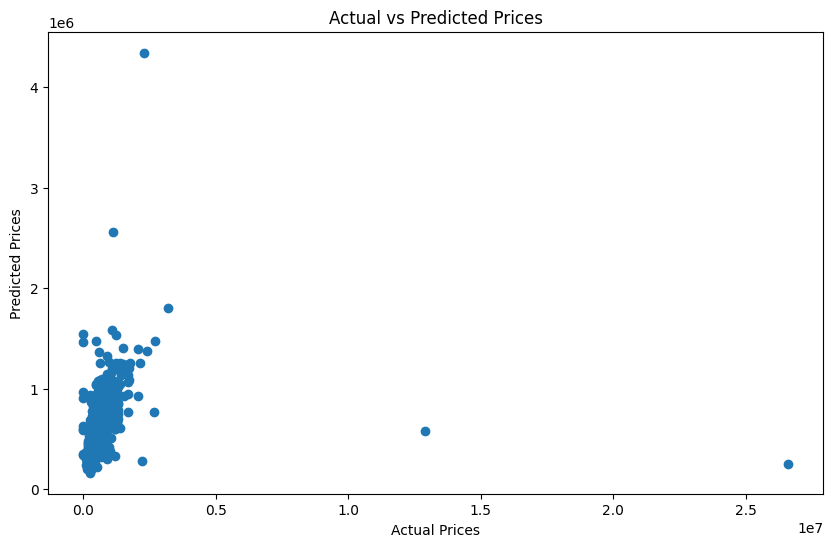

In [24]:
# Visualisasi prediksi vs real value
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

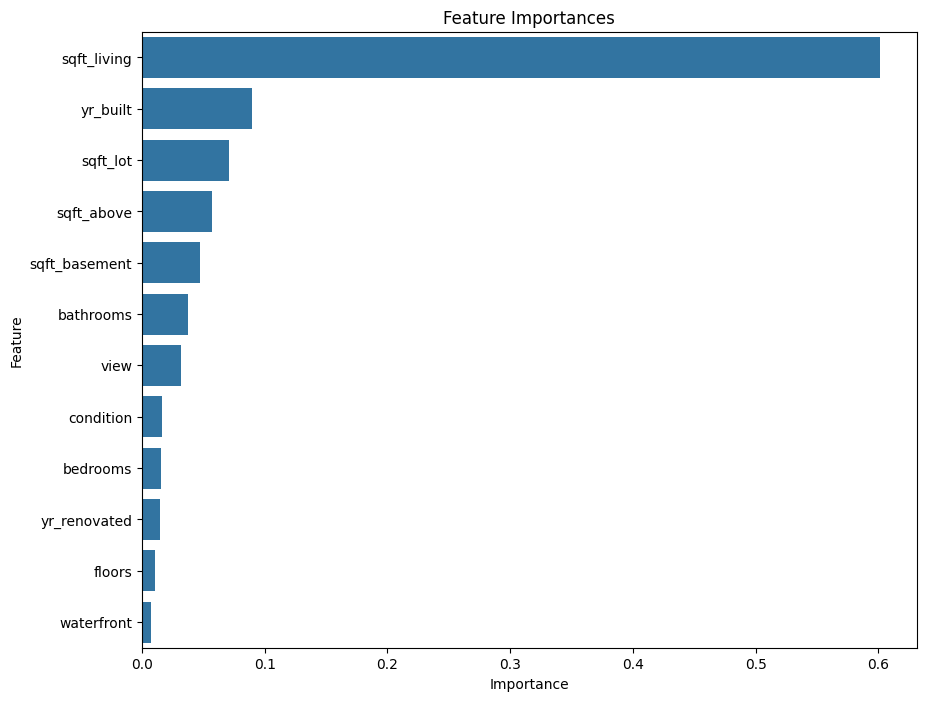

In [32]:
# Visualisasi feature importance
# Pastikan preprocessor sudah fit sebelum mengambil feature names
feature_names = numerical_features
feature_importances = best_model.named_steps['model'].feature_importances_
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()